In [9]:
# import libraries

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import ipywidgets as wg
from IPython.display import display
from scipy.integrate import odeint


In [10]:
# time points to plot
n = 100

# final time
tf = 20

# time of set point change
SP_start = 2

def process(y, t, u):
    Kp = 4
    taup = 3
    thetap = 1
    if t < (thetap + SP_start):
        dydt = 0 # time delay

    else:
        dydt = (1 / taup) * (-y + Kp * u)
    
    return dydt

def pidPlot(Kc, tauI, tauD):
    
    # create time vector
    t = np.linspace(0, tf, n)
    
    # initialize proportional term 
    P = np.zeros(n)

    # initialize integral term
    I = np.zeros(n)

    # initialize derivative term
    D = np.zeros(n)

    # initialize error
    e = np.zeros(n)

    # initialize controller output
    OP = np.zeros(n)

    # initialize process variable
    PV = np.zeros(n)

    # initialize setpoint
    SP = np.zeros(n)

    # setpoint start
    SP_step = int(SP_start/(tf/(n-1))+1)

    # define setpoint
    SP[0:SP_step] = 0

    # step up
    SP[SP_step:n] = 4
    
    # initial condition
    y0 = 0

    # loop through all time steps
    for i in range(1,n):
        
        # simulate process for one time step

        # time interval
        ts = [t[i-1], t[i]]

        # compute next step
        y = odeint(process, y0, ts, args=(OP[i-1],))

        # calculate new OP with PID
        # record PV
        PV[i] = y[1]
        
        # calculate error = SP - PV
        e[i] = SP[i] - PV[i]

        # calculate time step
        dt = t[i] - t[i-1]

        # calculate proportional term
        P[i] = Kc * e[i]

        # calculate integral term
        I[i] = I[i-1] + (Kc/tauI) * e[i] * dt

        # calculate derivative term
        D[i] = -Kc * tauD * (PV[i]-PV[i-1])/dt

        # calculate new controller output
        OP[i] = P[i] + I[i] + D[i]

    # plot PID response
    plt.figure(1, figsize=(15,7))
    plt.subplot(2,2,1)
    plt.plot(t, SP, 'k-', linewidth = 2, label = 'Setpoint (SP)')
    plt.plot(t, PV, 'r:', linewidth = 2, label = 'Process Variable (PV)')
    plt.legend(loc= 'best')
    plt.subplot(2,2,2)
    plt.plot(t, P,'g-', linewidth=2, label=r'Proportional = $K_c \; e(t)$')
    plt.plot(t, I, 'b-', linewidth = 2, label = r'Integral = $\frac{K_c}{\tau_I}\int_{i=0}^{n_t} e(t) \; dt $')
    plt.plot(t, D,'r--',linewidth=2,label=r'Derivative = $-K_c \tau_D \frac{d(PV)}{dt}$')    
    plt.legend(loc = 'best')
    plt.subplot(2,2,3)
    plt.plot(t, e, 'm--', linewidth = 2, label = 'Error (e = SP-PV)')
    plt.subplot(2,2,4)
    plt.plot(t, OP, 'b--', linewidth = 2, label='Controller Output (OP)')
    plt.legend(loc = 'best')
    plt.xlabel('time')    

interactive(children=(FloatSlider(value=0.1, description='Kc', max=1.0, min=-0.2, step=0.05), FloatSlider(valu…

<function __main__.pidPlot(Kc, tauI, tauD)>

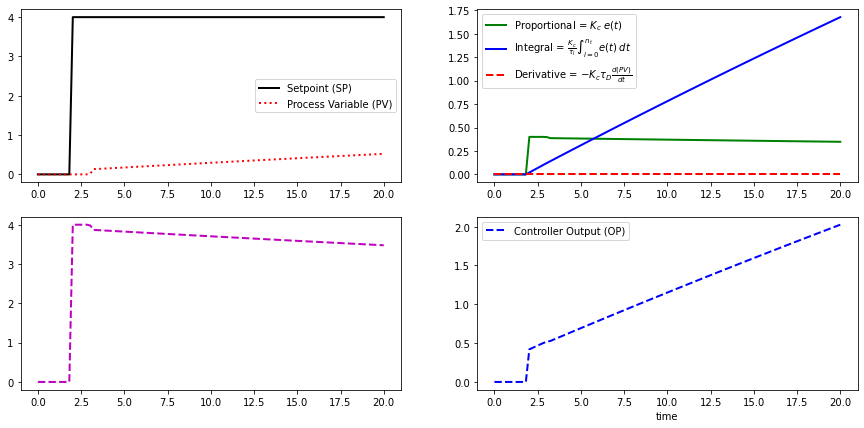

In [11]:
Kc_slide = wg.FloatSlider(value = 0.1, min = -0.2, max = 1.0, step = 0.05)
tauI_slide = wg.FloatSlider(value = 4.0, min = 0.01, max = 5.0, step = 0.1)
tauD_slide = wg.FloatSlider(value = 0.0, min = 0.0, max = 1.0, step = 0.1)
wg.interact(pidPlot, Kc = Kc_slide, tauI = tauI_slide, tauD = tauD_slide)